In [ ]:
import pandas as pd
from pandas import qcut
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors

##Customer Address (df1)


In [ ]:
df1 = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','CustomerAddress')

In [ ]:
df1.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [ ]:
df1.isnull().values.sum()

0

In [ ]:
df1.columns = df1.iloc[0]
df1 = df1[1:]

In [ ]:
df1.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
df1['state']=df1['state'].str.replace('New South Wales','NSW')
df1['state']=df1['state'].str.replace('Victoria','VIC')

In [ ]:
df1 = df1.apply(lambda x:x.astype('float') if x.name in ['property_valuation'] else x)

Graph

Text(0, 0.5, 'Number of Customers')

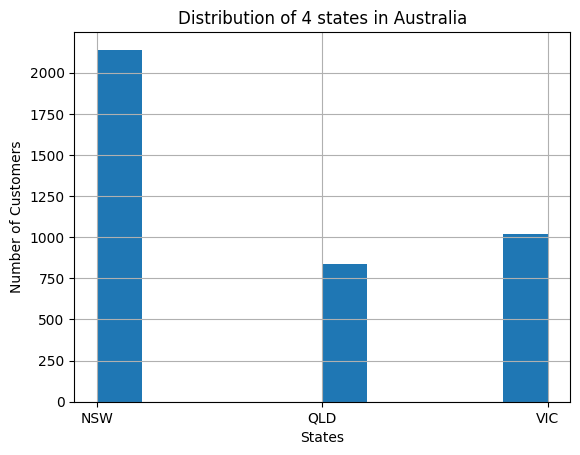

In [ ]:
df1['state'].hist()
plt.title('Distribution of 4 states in Australia')
plt.xlabel('States')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

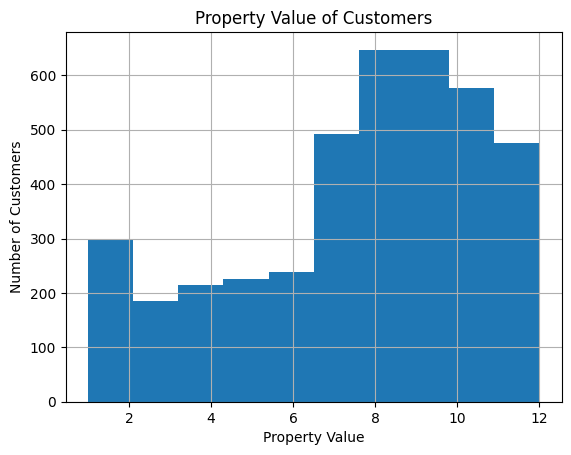

In [ ]:
df1['property_valuation'].hist()
plt.title('Property Value of Customers')
plt.xlabel('Property Value')
plt.ylabel('Number of Customers')

In [ ]:
state_wealth = df1.groupby('state')['property_valuation'].mean().reset_index()

Text(0, 0.5, 'Average Wealth')

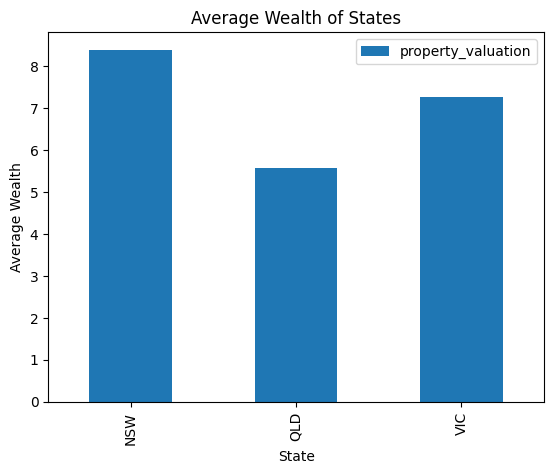

In [ ]:
state_wealth.plot(x='state',y='property_valuation',kind='bar')
plt.title('Average Wealth of States')
plt.xlabel('State')
plt.ylabel('Average Wealth')

##Customer Demographic (df2)


In [ ]:
df2 = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','CustomerDemographic')

In [ ]:
df2.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,U,71,NaN,120.0,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaN,120.0,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaN,120.0,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaN,120.0,Senior Sales Associate,IT,Mass Customer,N,No,NaN


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   name                                 4000 non-null   object 
 2   gender                               4000 non-null   object 
 3   past_3_years_bike_related_purchases  4000 non-null   int64  
 4   DOB                                  3913 non-null   object 
 5   age                                  3999 non-null   float64
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

In [ ]:
df2['age']=df2['age'].apply(lambda x:np.NaN if x==120 else x)

In [ ]:
for columns in df2:
  if df2[columns].isnull().values.sum() != 0 and df2[columns].dtypes != np.float64:
    df2[columns].fillna(df2[columns].mode()[0], inplace=True)
  if df2[columns].isnull().values.sum() != 0 and df2[columns].dtypes == np.float64:
    df2[columns].fillna(df2[columns].mean().round(0), inplace=True)

In [ ]:
df2=df2.round(0)

In [ ]:
df2['age_group']=df2['age'].apply(lambda x:str(round(x,-1))+' '+'to'+' '+str(round(x,-1)+10))

In [ ]:
df2.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age_group
0,34,Jephthah Bachmann,U,59,1843-12-21,42.0,Legal Assistant,IT,Affluent Customer,N,No,20.0,40.0 to 50.0
1,144,Jory Barrabeale,U,71,1978-01-30 00:00:00,42.0,Environmental Tech,IT,Mass Customer,N,No,11.0,40.0 to 50.0
2,168,Reggie Broggetti,U,8,1978-01-30 00:00:00,42.0,General Manager,IT,Affluent Customer,N,Yes,11.0,40.0 to 50.0
3,267,Edgar Buckler,U,53,1978-01-30 00:00:00,42.0,Business Systems Development Analyst,IT,High Net Worth,N,No,11.0,40.0 to 50.0
4,290,Giorgio Kevane,U,42,1978-01-30 00:00:00,42.0,Senior Sales Associate,IT,Mass Customer,N,No,11.0,40.0 to 50.0


Graph

Text(0.5, 1.0, 'Age Group')

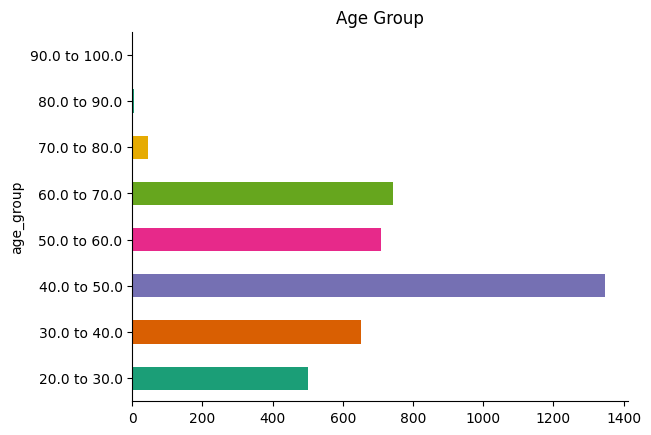

In [ ]:
df2.groupby('age_group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Age Group')

Text(0.5, 1.0, 'Gender')

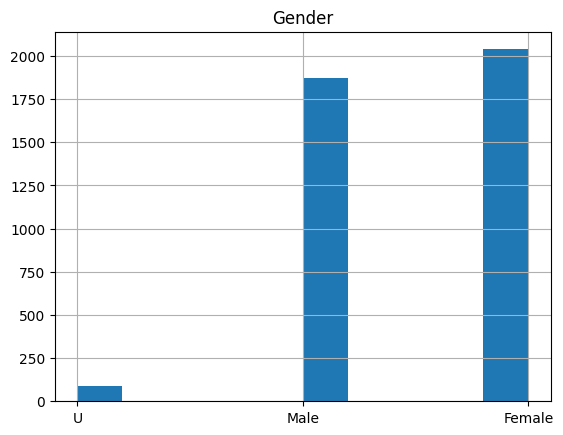

In [ ]:
df2['gender'].hist()
plt.title('Gender')

Text(0.5, 1.0, 'Job Industry')

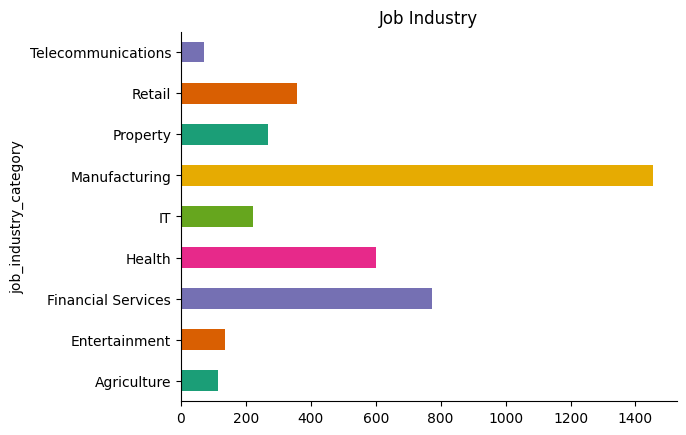

In [ ]:
df2.groupby('job_industry_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Job Industry')

Text(0.5, 1.0, 'Owns Car or Not')

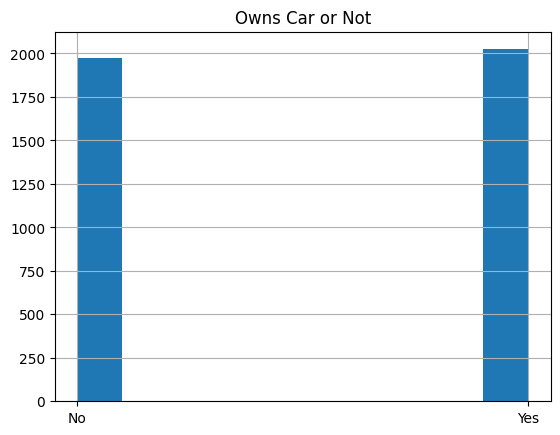

In [ ]:
df2['owns_car'].hist()
plt.title('Owns Car or Not')

Text(0.5, 1.0, 'Tenure')

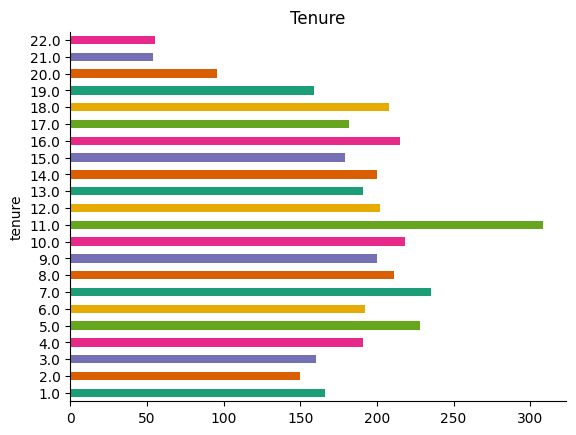

In [ ]:
df2.groupby('tenure').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Tenure')

Text(0.5, 1.0, 'Wealth Segment')

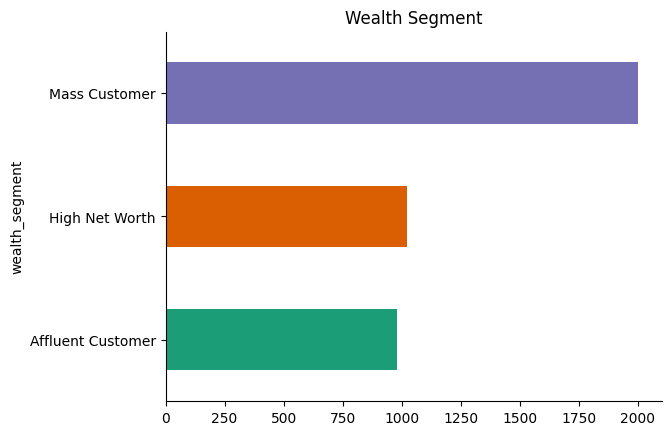

In [ ]:
df2.groupby('wealth_segment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Wealth Segment')

##Transactions (df3)

In [ ]:
df3 = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','Transactions')

In [ ]:
df3.columns=df3.iloc[0]
df3 = df3[1:]
df3

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [ ]:
df3 = df3.apply(lambda x: x.astype('float') if x.name in ['standard_cost','list_price'] else x, axis=0)

In [ ]:
for columns in df3:
  if df3[columns].isnull().values.sum() != 0 and df3[columns].dtypes != np.float64:
    df3[columns].fillna(df3[columns].mode()[0], inplace=True)
  if df3[columns].isnull().values.sum() != 0 and df3[columns].dtypes == np.float64:
    df3[columns].fillna(df3[columns].mean(), inplace=True)

In [ ]:
df3['transaction_date']=pd.to_datetime(df3['transaction_date'])
df3['transaction_month']=df3['transaction_date'].dt.to_period('M')

In [ ]:
df3['profit']=df3['list_price']-df3['standard_cost']

In [ ]:
df3.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_month,profit
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,2017-02,17.87
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,2017-05,1702.55
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,2017-10,1544.61
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145,2017-08,817.36
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226,2017-10,1055.82


Text(0.5, 1.0, 'Brand')

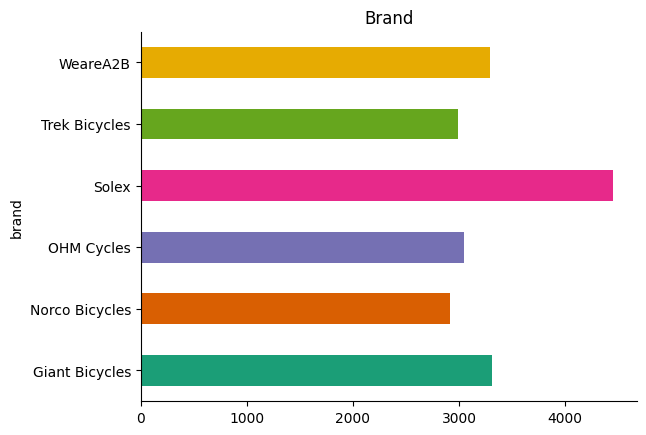

In [ ]:
df3.groupby('brand').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Brand')

Text(0.5, 1.0, 'Product Class')

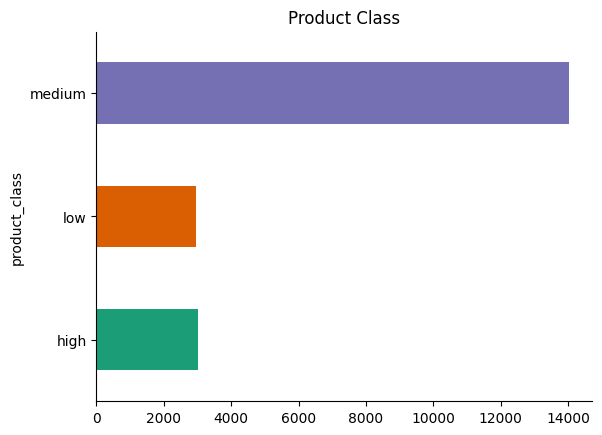

In [ ]:
df3.groupby('product_class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Product Class')

Text(0.5, 1.0, 'Product Size')

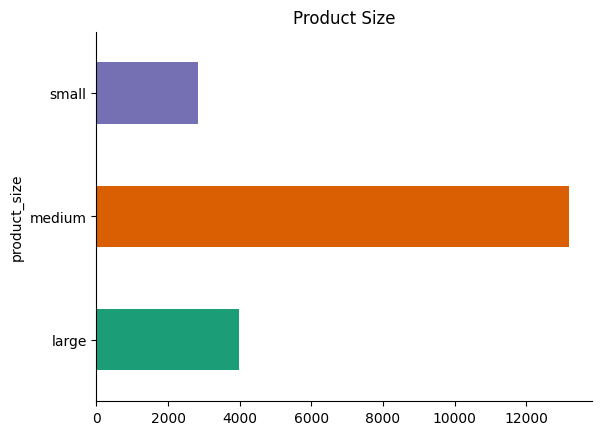

In [ ]:
df3.groupby('product_size').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Product Size')

Text(0.5, 1.0, 'Profit of Different Brands')

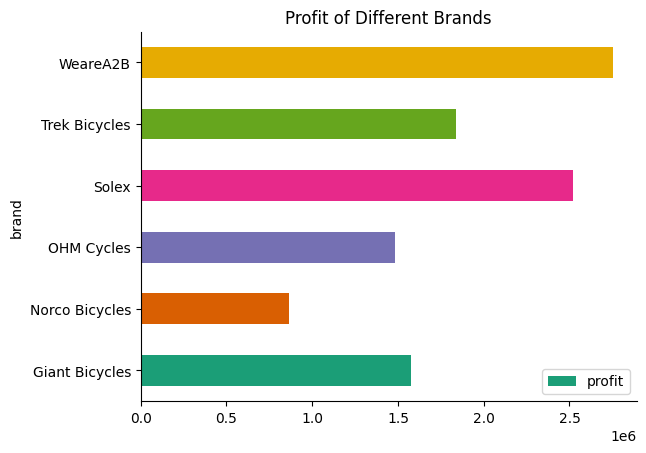

In [ ]:
dfprofit = df3.groupby(['brand'])['profit'].sum().round(3).reset_index()
dfprofit.plot(x='brand',y='profit',kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Profit of Different Brands')

##Overall Analysis (Part 1)

In [ ]:
df = df3.merge(df2,how='left',on='customer_id').merge(df1,how='left',on='customer_id')

In [ ]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,owns_car,tenure,age_group,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,Yes,10.0,60.0 to 70.0,984 Hoepker Court,3064,VIC,Australia,6.0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,Mass Customer,N,Yes,10.0,40.0 to 50.0,4 Shopko Circle,2196,NSW,Australia,5.0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,Affluent Customer,N,No,22.0,40.0 to 50.0,586 Miller Parkway,2835,NSW,Australia,1.0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,Mass Customer,N,No,16.0,60.0 to 70.0,1617 Harper Parkway,2096,NSW,Australia,10.0
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,...,Affluent Customer,N,Yes,2.0,20.0 to 30.0,0601 Stephen Place,2292,NSW,Australia,7.0


In [ ]:
for columns in df:
  if df[columns].isnull().values.sum() != 0 and df[columns].dtypes != np.float64:
    df[columns].fillna(df[columns].mode()[0], inplace=True)
  if df[columns].isnull().values.sum() != 0 and df[columns].dtypes == np.float64:
    df[columns].fillna(df[columns].mean(), inplace=True)

In [ ]:
#dimension+++++
#profit
#divide different kind of customers
#more plot kind

In [ ]:
dfret = df3.groupby(['transaction_month'])['transaction_id'].count().reset_index()
dfret

,transaction_month,transaction_id
0,2017-01,1682
1,2017-02,1623
2,2017-03,1656
3,2017-04,1655
4,2017-05,1685
5,2017-06,1581
6,2017-07,1717
7,2017-08,1749
8,2017-09,1572
9,2017-10,1771


Text(0, 0.5, 'Month')

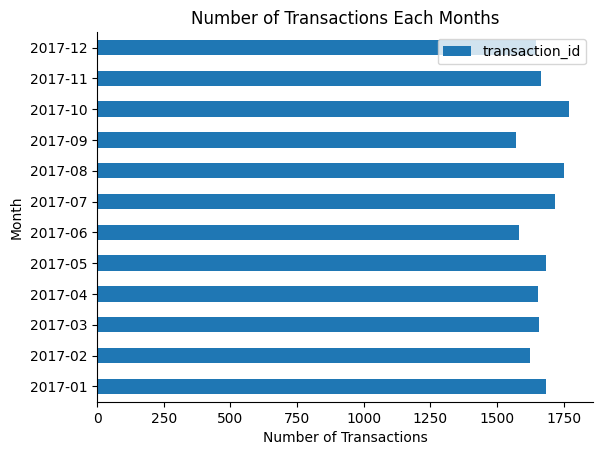

In [ ]:
dfret.plot(x='transaction_month',y='transaction_id',kind='barh')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Number of Transactions Each Months')
plt.xlabel('Number of Transactions')
plt.ylabel('Month')

Text(0.5, 1.0, 'Brand, Gender and Wealth Segment')

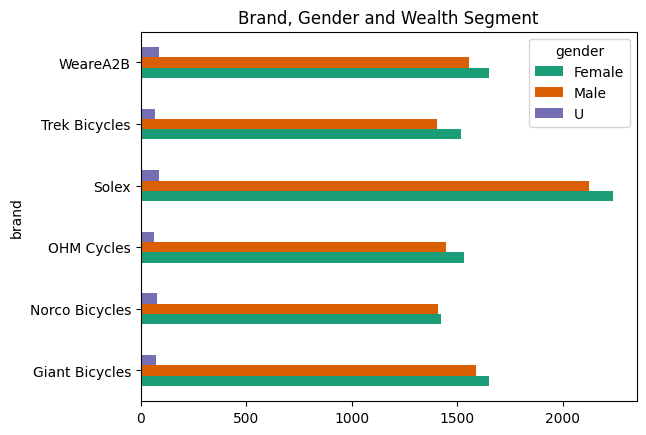

In [ ]:
dfn = df.groupby(['gender','brand']).count().unstack('gender')
dfn['wealth_segment'].plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.title('Brand, Gender and Wealth Segment')

Text(0.5, 1.0, 'Job Industry Category, Wealth Segment and Property Valuation')

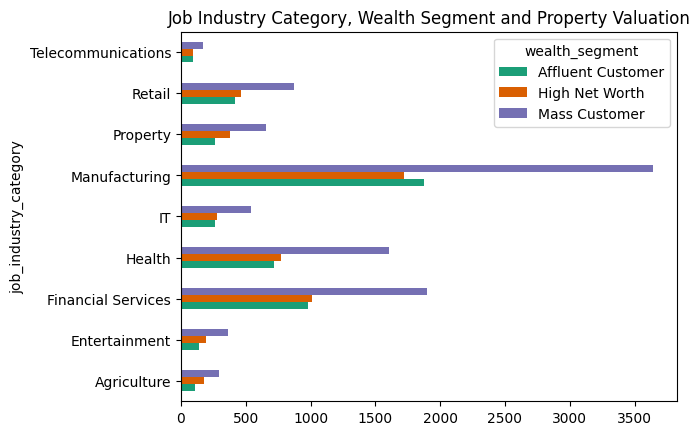

In [ ]:
dfn = df.groupby(['job_industry_category','wealth_segment']).count().unstack('wealth_segment')
dfn['property_valuation'].plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.title('Job Industry Category, Wealth Segment and Property Valuation')

Text(0.5, 1.0, 'Job Industry Category, Product Size and Property Valuation')

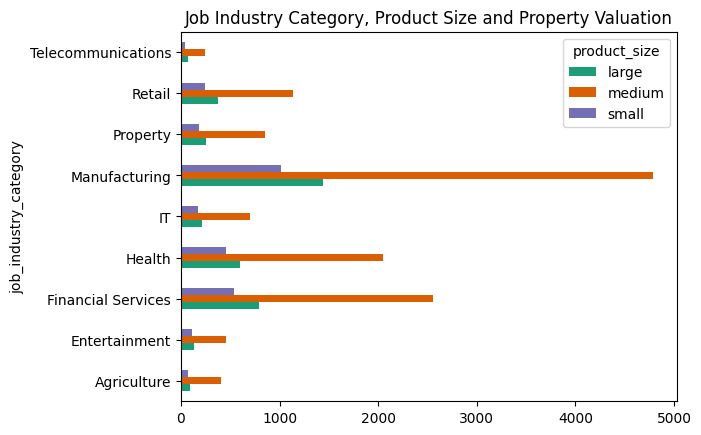

In [ ]:
dfn = df.groupby(['job_industry_category','product_size']).count().unstack('product_size')
dfn['property_valuation'].plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.title('Job Industry Category, Product Size and Property Valuation')

Text(0.5, 1.0, 'Brand and Car Owning')

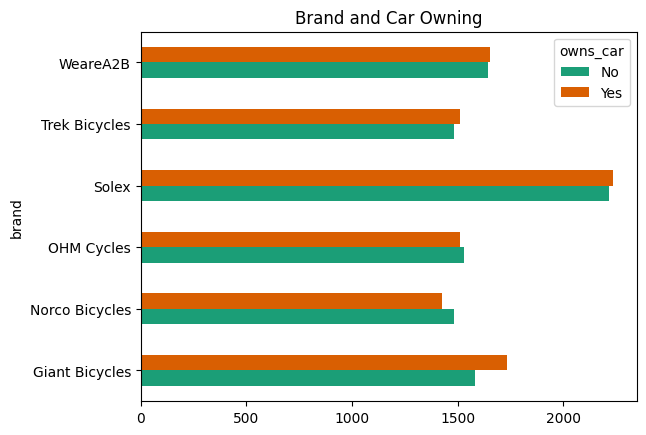

In [ ]:
dfn = df.groupby(['brand','owns_car']).count().unstack('owns_car')
dfn['transaction_id'].plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.title('Brand and Car Owning')

Text(0.5, 1.0, 'Brand and State')

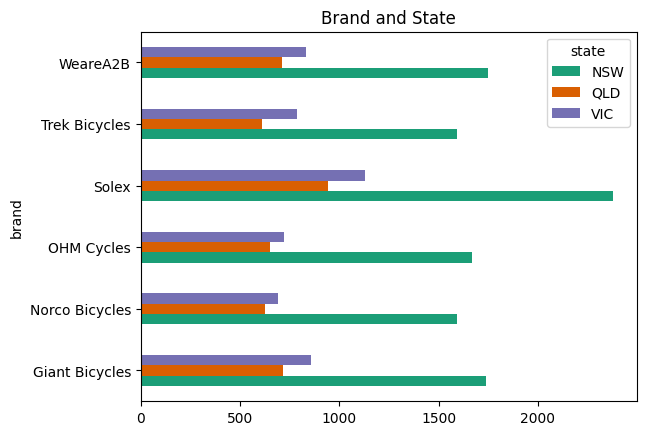

In [ ]:
dfn = df.groupby(['state','brand']).count().unstack('state')
dfn['transaction_id'].plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.title('Brand and State')

Text(0.5, 1.0, 'Brand Profit and State')

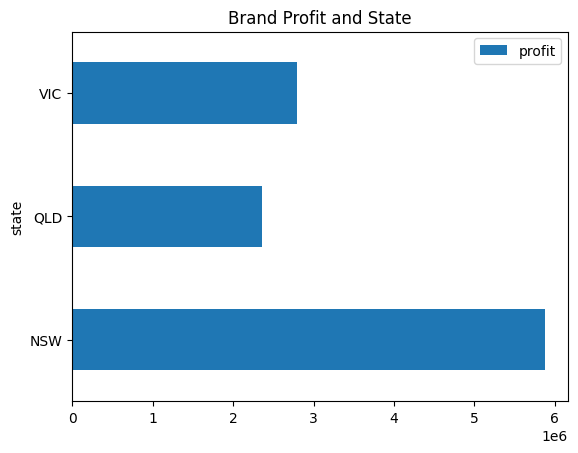

In [ ]:
dfn = df.groupby(['state'])['profit'].sum().reset_index()
dfn.plot(x='state',y='profit',kind='barh')
plt.title('Brand Profit and State')

##Cohort Analysis


In [ ]:
df['cohort'] = df.groupby('customer_id')['transaction_date'].transform('min').dt.to_period('M')

In [ ]:
dfcohort = df.groupby(['cohort','transaction_month']).nunique()['customer_id'].reset_index(drop=False)

In [ ]:
dfcohort['period_number']=(dfcohort.transaction_month-dfcohort.cohort).apply(attrgetter('n'))

In [ ]:
pivot = dfcohort.pivot_table(index='cohort',columns='period_number',values='customer_id')

In [ ]:
size=pivot.iloc[:,0]

In [ ]:
ret_matrix = pivot.divide(size,axis=0)

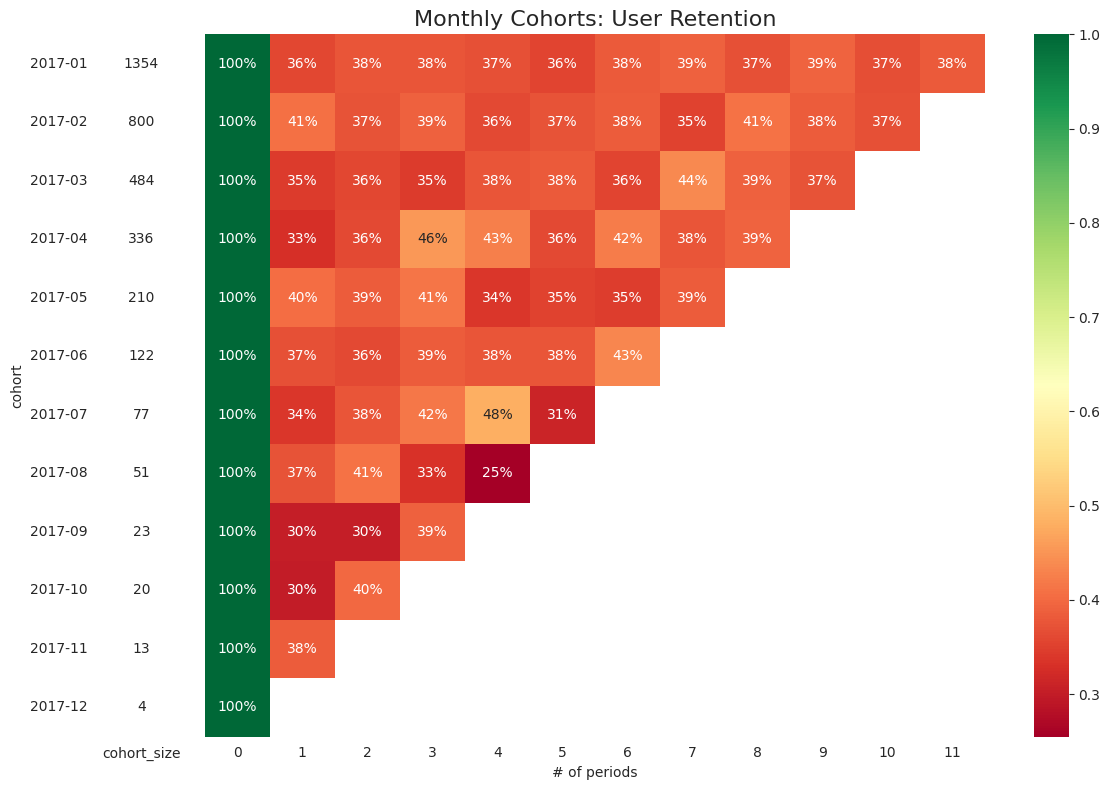

In [ ]:
with sns.axes_style("white"):
  fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
  sns.heatmap(ret_matrix,mask=ret_matrix.isnull(),annot=True,fmt='.0%',cmap='RdYlGn',ax=ax[1])
  ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
  ax[1].set(xlabel='# of periods',ylabel='')
  cohort_size_df = pd.DataFrame(size).rename(columns={0: 'cohort_size'})
  white_cmap = mcolors.ListedColormap(['white'])
  sns.heatmap(cohort_size_df,annot=True,cbar=False,fmt='g',cmap=white_cmap,ax=ax[0])
  fig.tight_layout()

There are several anomalies in the retention rate. The 7th month after March (36%-44%), the 3rd and 5th month after April, the 4th month after May, the 4th and 5th month after July, 3rd and 4th months of August, 3rd month after September, 2nd month after October.

Thus we can focus on the months September to October, July to August to September, November to December

##RFM

In [ ]:
newdate = max(df.transaction_date)+dt.timedelta(days=1)

In [ ]:
rfm=df.groupby(['customer_id']).agg({'transaction_date':lambda x:(newdate-x.max()).days, 'transaction_id':'count','profit':'sum'})

In [ ]:
rfm.rename(columns={'transaction_date':'Recency','transaction_id':'Frequency','profit':'MonetaryValue'},inplace=True)

In [ ]:
recency_labels = range(5, 0, -1)
frequency_labels = range(1, 6)
monetary_labels = range(1, 6)
recency_groups = pd.qcut(rfm['Recency'], q=5, labels=recency_labels)
frequency_groups = pd.qcut(rfm['Frequency'], q=5, labels=frequency_labels,duplicates='drop')
monetary_groups = pd.qcut(rfm['MonetaryValue'], q=5, labels=monetary_labels)
rfm = rfm.assign(R=recency_groups.values, F=frequency_groups.values, M=monetary_groups)

In [ ]:
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

In [ ]:
def rfm_level(df):
  if df['RFM_Score'] >= 14:
    return 'Platinum+'
  elif ((df['RFM_Score'] >= 11) and (df['RFM_Score'] < 14)):
    return 'Platinum'
  elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 11)):
    return 'Gold'
  elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 8)):
    return 'Silver'
  else:
    return 'Bronze'
rfm['RFM_Level']=rfm.apply(rfm_level, axis=1)

In [ ]:
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
customer_id,,,,,,,,
1,8,11,3018.090000,5,5,3,13,Platinum
2,129,3,2226.260000,1,1,2,4,Bronze
3,103,8,3362.810000,1,4,3,8,Gold
4,196,2,220.570000,1,1,1,3,Bronze
5,17,6,2394.940000,4,3,2,9,Gold
...,...,...,...,...,...,...,...,...
3497,53,3,1648.320000,3,1,2,6,Silver
3498,128,6,3147.330000,1,3,3,7,Silver
3499,52,7,4955.250000,3,4,5,12,Platinum


In [ ]:
rfm_level = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean'
}).round(3)

In [ ]:
rfm_level.columns=['recency_mean','frequency_mean','monetaryvalue_mean']
rfm_level=rfm_level.reindex(index=['Bronze','Silver','Gold','Platinum','Platinum+'])

In [ ]:
rfm_level

,recency_mean,frequency_mean,monetaryvalue_mean
RFM_Level,,,
Bronze,129.313,3.194,1374.071
Silver,67.096,4.326,2183.159
Gold,49.558,5.768,3106.353
Platinum,32.326,7.569,4482.473
Platinum+,12.734,9.504,6032.510


Text(0.5, 0, 'RFM level')

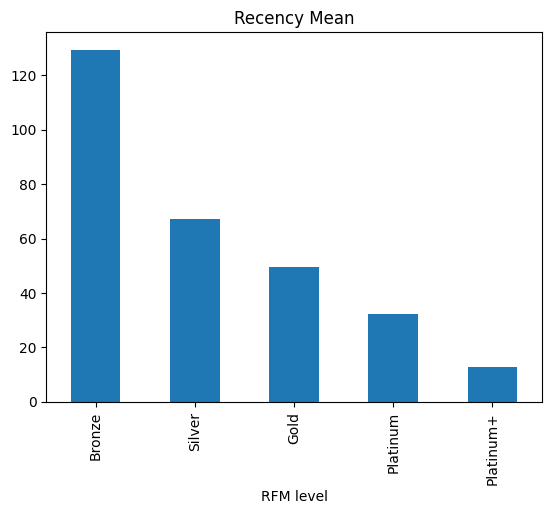

In [ ]:
rfm_level['recency_mean'].plot(kind='bar')
plt.title('Recency Mean')
plt.xlabel('RFM level')

Text(0.5, 0, 'RFM level')

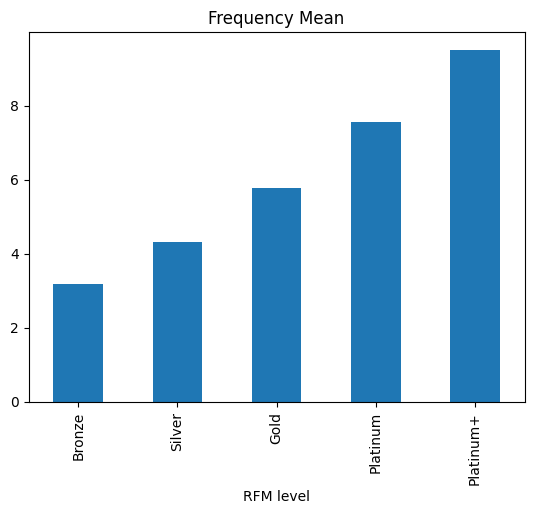

In [ ]:
rfm_level['frequency_mean'].plot(kind='bar')
plt.title('Frequency Mean')
plt.xlabel('RFM level')

Text(0.5, 0, 'RFM level')

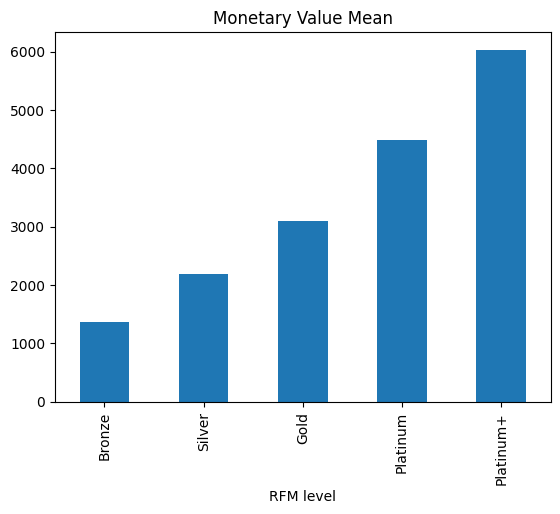

In [ ]:
rfm_level['monetaryvalue_mean'].plot(kind='bar')
plt.title('Monetary Value Mean')
plt.xlabel('RFM level')

##Root Cause Analysis

In [ ]:
dfrfm = df.merge(rfm,how='left',on='customer_id')
dfrfm.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,property_valuation,cohort,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,6.0,2017-02,76,3,645.99,2,1,1,4,Bronze
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,5.0,2017-01,21,7,4179.11,4,4,4,12,Platinum
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,1.0,2017-01,57,6,4965.43,3,3,5,11,Platinum
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,10.0,2017-02,122,7,3983.97,1,4,4,9,Gold
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,...,7.0,2017-01,76,10,6646.00,2,5,5,12,Platinum


Text(0.5, 1.0, 'Brand and RFM Level')

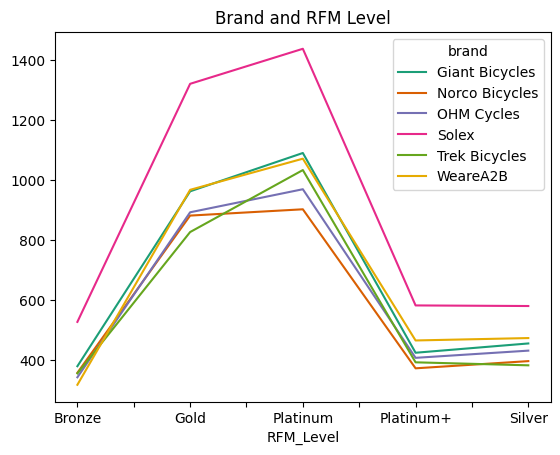

In [ ]:
dfn = dfrfm.groupby(['RFM_Level','brand']).count().unstack('brand')
dfn['transaction_id'].plot(kind='line',color=sns.palettes.mpl_palette('Dark2'))
plt.title('Brand and RFM Level')

Text(0.5, 1.0, 'State and RFM level')

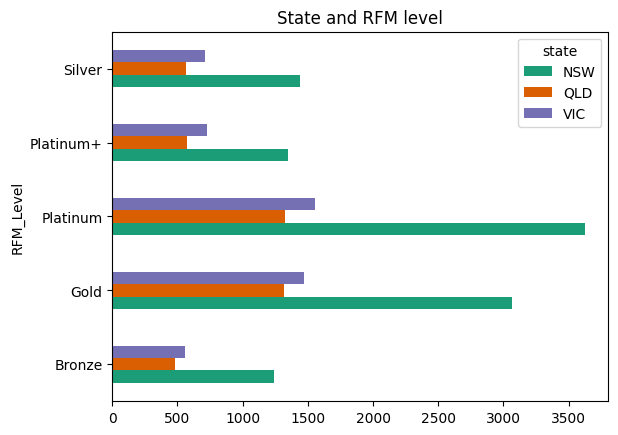

In [ ]:
dfn = dfrfm.groupby(['state','RFM_Level']).count().unstack('state')
dfn['transaction_id'].plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.title('State and RFM level')

Text(0.5, 1.0, 'Online Order and RFM level')

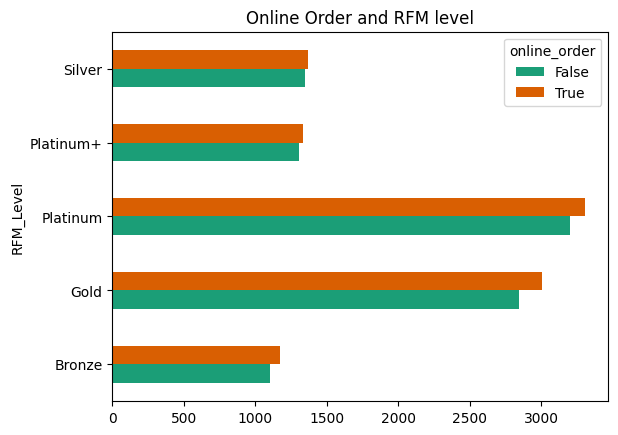

In [ ]:
dfn = dfrfm.groupby(['online_order','RFM_Level']).count().unstack('online_order')
dfn['transaction_id'].plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.title('Online Order and RFM level')

Text(0.5, 1.0, 'Gender and RFM level')

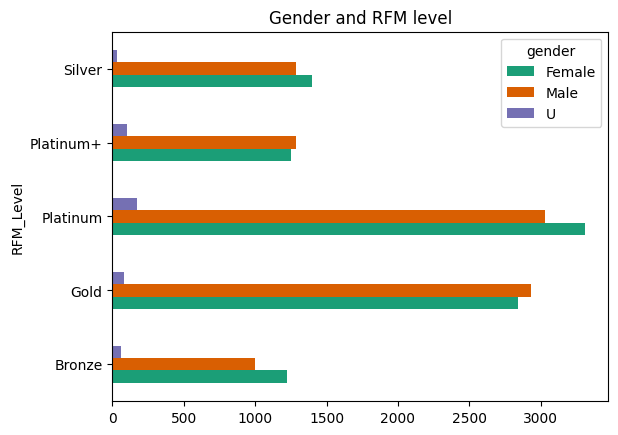

In [ ]:
dfn = dfrfm.groupby(['gender','RFM_Level']).count().unstack('gender')
dfn['transaction_id'].plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.title('Gender and RFM level')

In [ ]:
dfrfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       20000 non-null  object        
 1   product_id                           20000 non-null  object        
 2   customer_id                          20000 non-null  object        
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         20000 non-null  bool          
 5   order_status                         20000 non-null  object        
 6   brand                                20000 non-null  object        
 7   product_line                         20000 non-null  object        
 8   product_class                        20000 non-null  object        
 9   product_size                         20000 non-null  object        
 10  list_price

Text(0.5, 1.0, 'Job Industry and RFM level')

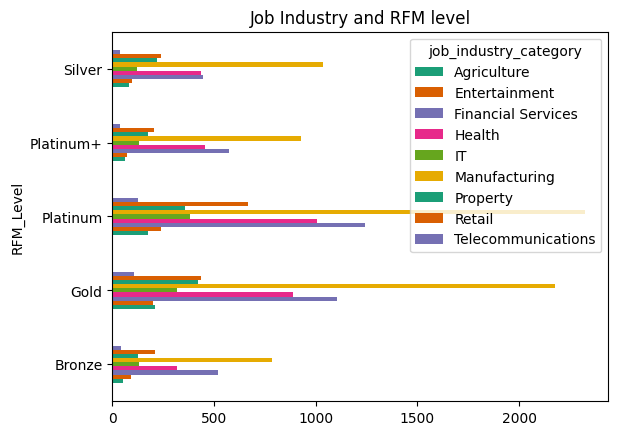

In [ ]:
dfn = dfrfm.groupby(['job_industry_category','RFM_Level']).count().unstack('job_industry_category')
dfn['transaction_id'].plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.title('Job Industry and RFM level')

Text(0.5, 1.0, 'Wealth Segment and RFM level')

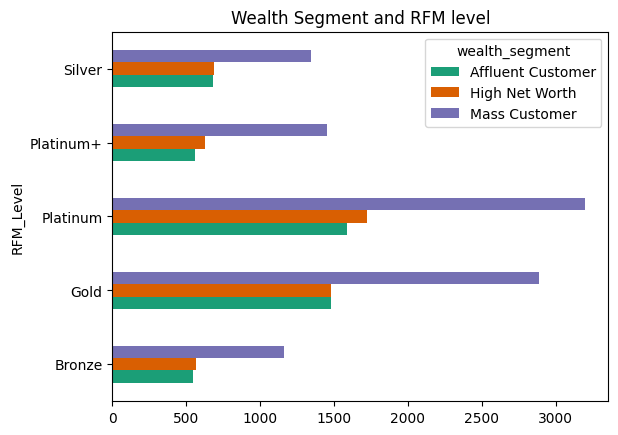

In [ ]:
dfn = dfrfm.groupby(['wealth_segment','RFM_Level']).count().unstack('wealth_segment')
dfn['transaction_id'].plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.title('Wealth Segment and RFM level')

Text(0.5, 1.0, 'Wealth Segment and RFM level')

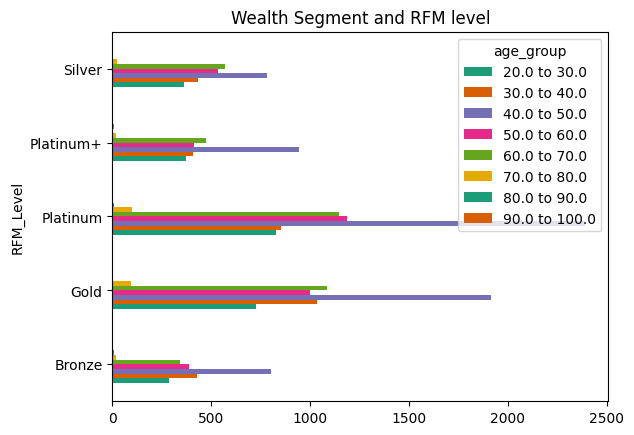

In [ ]:
dfn = dfrfm.groupby(['age_group','RFM_Level']).count().unstack('age_group')
dfn['transaction_id'].plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.title('Wealth Segment and RFM level')

## 4th and 5th Month after July (November - December, 48% - 31%)

In [ ]:
df7f = dfrfm[dfrfm['cohort'].dt.month.isin([7])]
df7f

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,property_valuation,cohort,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
63,64,0,2000,2017-07-08,False,Approved,Trek Bicycles,Standard,medium,medium,...,8.0,2017-07,45,3,999.00,3,1,1,5,Bronze
99,100,0,119,2017-07-31,False,Approved,Solex,Standard,medium,medium,...,7.0,2017-07,31,4,4217.24,4,1,4,9,Gold
121,122,24,1038,2017-12-01,True,Approved,Solex,Road,medium,large,...,6.0,2017-07,13,4,2079.20,5,1,2,8,Gold
267,268,68,1516,2017-08-27,False,Approved,OHM Cycles,Standard,medium,medium,...,10.0,2017-07,38,5,4256.32,3,2,4,9,Gold
363,364,32,1112,2017-09-13,False,Approved,Giant Bicycles,Standard,medium,medium,...,11.0,2017-07,109,3,1217.23,1,1,1,3,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19709,19710,93,45,2017-11-17,True,Approved,WeareA2B,Standard,medium,medium,...,3.0,2017-07,44,3,1048.15,3,1,1,5,Bronze
19798,19799,36,2514,2017-07-24,False,Approved,Solex,Standard,low,medium,...,10.0,2017-07,47,3,1853.30,3,1,2,6,Silver
19886,19887,43,899,2017-10-04,False,Approved,Solex,Standard,medium,medium,...,7.0,2017-07,50,6,1274.48,3,3,1,7,Silver
19920,19921,38,1903,2017-10-20,False,Approved,Trek Bicycles,Standard,medium,large,...,7.0,2017-07,17,4,4098.86,4,1,4,9,Gold


In [ ]:
df1112=df7f[df7f['transaction_month'].dt.month.isin([12,11])]

In [ ]:
df1112

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,property_valuation,cohort,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
121,122,24,1038,2017-12-01,True,Approved,Solex,Road,medium,large,...,6.0,2017-07,13,4,2079.20,5,1,2,8,Gold
1067,1068,96,2215,2017-12-11,True,Approved,WeareA2B,Road,low,small,...,6.0,2017-07,20,2,327.23,4,1,1,6,Silver
1091,1092,92,3395,2017-12-21,False,Approved,WeareA2B,Standard,medium,small,...,8.0,2017-07,10,7,2586.85,5,4,3,12,Platinum
1750,1751,22,2730,2017-11-21,False,Approved,WeareA2B,Standard,medium,medium,...,7.0,2017-07,5,7,1604.23,5,4,1,10,Gold
2132,2133,85,2694,2017-12-01,False,Approved,WeareA2B,Standard,medium,medium,...,3.0,2017-07,30,4,1536.90,4,1,1,6,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19189,19190,68,1516,2017-11-23,True,Approved,OHM Cycles,Standard,medium,medium,...,10.0,2017-07,38,5,4256.32,3,2,4,9,Gold
19287,19288,62,1516,2017-11-07,True,Approved,Solex,Standard,medium,medium,...,10.0,2017-07,38,5,4256.32,3,2,4,9,Gold
19460,19461,20,1809,2017-11-19,True,Approved,Trek Bicycles,Standard,medium,small,...,7.0,2017-07,28,6,3918.15,4,3,4,11,Platinum
19603,19604,74,926,2017-12-18,False,Approved,WeareA2B,Standard,medium,medium,...,8.0,2017-07,13,6,1414.17,5,3,1,9,Gold


Text(0.5, 1.0, 'RFM level')

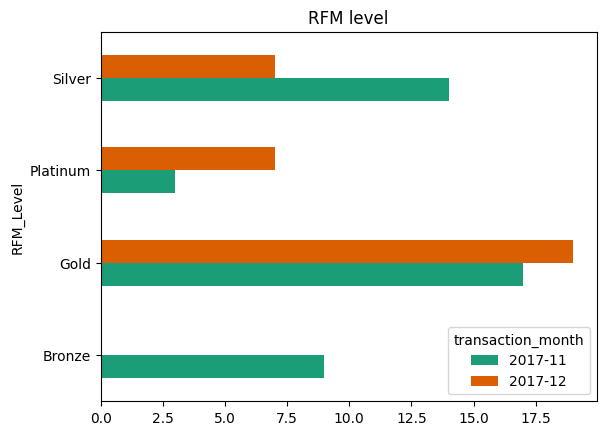

In [ ]:
dfn = df1112.groupby(['transaction_month','RFM_Level']).count().unstack('transaction_month')
dfn['transaction_id'].plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.title('RFM level')

Text(0.5, 1.0, 'Brand')

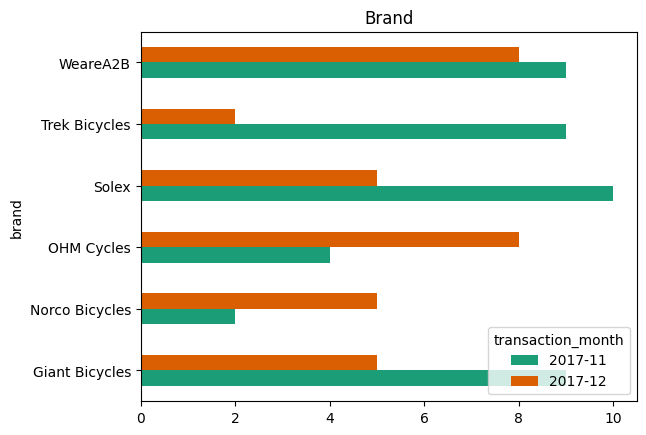

In [ ]:
dfn = df1112.groupby(['transaction_month','brand']).count().unstack('transaction_month')
dfn['transaction_id'].plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.title('Brand')

Text(0.5, 1.0, 'Wealth Segment')

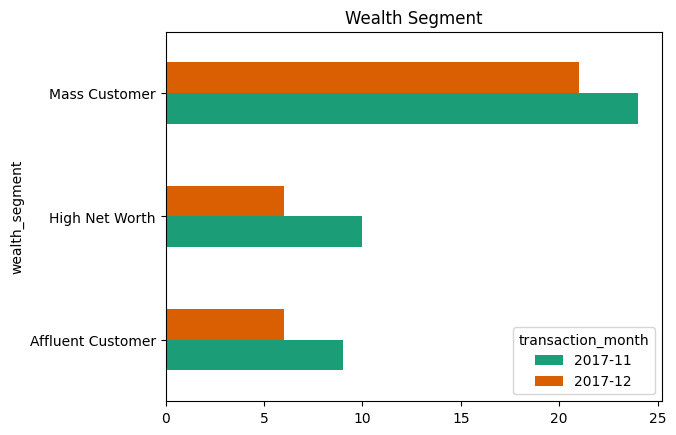

In [ ]:
dfn = df1112.groupby(['transaction_month','wealth_segment']).count().unstack('transaction_month')
dfn['transaction_id'].plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.title('Wealth Segment')

## 2nd and 3rd Month after April (June - July, 36% - 46%)

In [ ]:
df4f = dfrfm[dfrfm['cohort'].dt.month.isin([4])]

In [ ]:
df67 = df4f[df4f['transaction_month'].dt.month.isin([6,7])]

Text(0.5, 1.0, 'RFM level')

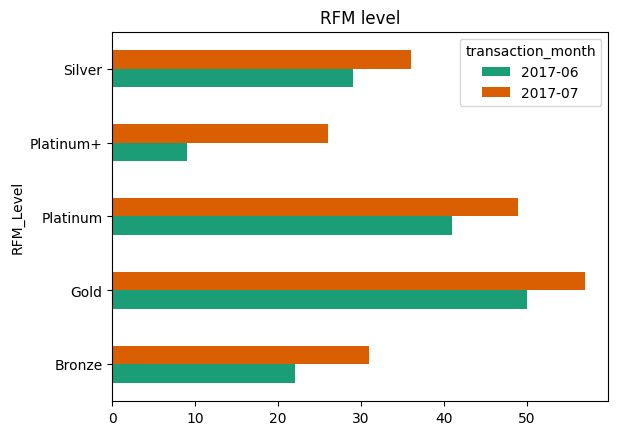

In [ ]:
dfn = df67.groupby(['transaction_month','RFM_Level']).count().unstack('transaction_month')
dfn['transaction_id'].plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.title('RFM level')

Text(0.5, 1.0, 'Brand')

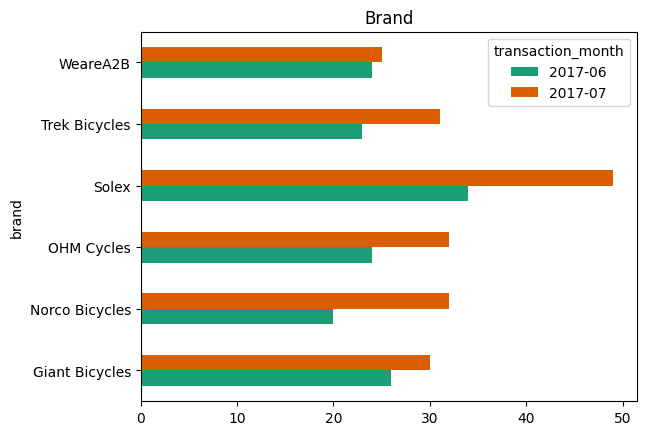

In [ ]:
dfn = df67.groupby(['transaction_month','brand']).count().unstack('transaction_month')
dfn['transaction_id'].plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.title('Brand')

Text(0.5, 1.0, 'Wealth Segment')

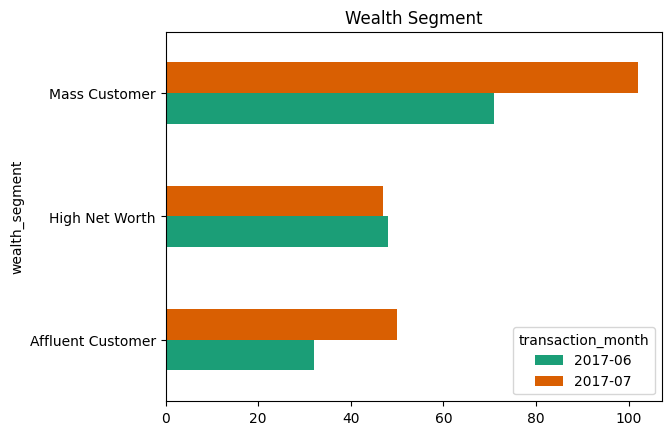

In [ ]:
dfn = df67.groupby(['transaction_month','wealth_segment']).count().unstack('transaction_month')
dfn['transaction_id'].plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.title('Wealth Segment')

In [ ]:
df67

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,owns_car,tenure,age_group,address,postcode,state,country,property_valuation,cohort
7,8,15,2459,2017-07-15,False,Approved,WeareA2B,Standard,medium,medium,...,N,No,18.0,30.0 to 40.0,975 Annamark Hill,4034,QLD,Australia,6.0,2017-04
35,36,92,3356,2017-07-07,False,Approved,WeareA2B,Standard,medium,small,...,N,Yes,6.0,60.0 to 70.0,73 Burrows Court,3121,VIC,Australia,8.0,2017-04
264,265,20,834,2017-06-26,False,Approved,Trek Bicycles,Standard,medium,small,...,N,No,3.0,50.0 to 60.0,3 Washington Plaza,3199,VIC,Australia,7.0,2017-04
372,373,1,1927,2017-06-24,False,Approved,Giant Bicycles,Standard,medium,medium,...,N,Yes,8.0,40.0 to 50.0,26876 Lyons Court,3166,VIC,Australia,10.0,2017-04
374,375,17,3276,2017-07-05,True,Approved,WeareA2B,Touring,medium,large,...,N,No,3.0,40.0 to 50.0,5 Coolidge Avenue,4750,QLD,Australia,2.0,2017-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19575,19576,50,1497,2017-07-01,False,Approved,Giant Bicycles,Standard,medium,medium,...,N,No,14.0,50.0 to 60.0,7049 Sutteridge Lane,2251,NSW,Australia,8.0,2017-04
19644,19645,66,2442,2017-07-12,False,Approved,Giant Bicycles,Road,low,small,...,N,Yes,17.0,60.0 to 70.0,336 Service Pass,2073,NSW,Australia,11.0,2017-04
19680,19681,62,3269,2017-06-27,False,Approved,Solex,Standard,medium,medium,...,N,No,1.0,20.0 to 30.0,65973 Morrow Alley,2170,NSW,Australia,9.0,2017-04
19863,19864,39,1511,2017-07-04,False,Approved,Giant Bicycles,Standard,medium,large,...,N,No,4.0,30.0 to 40.0,8802 Fisk Street,2234,NSW,Australia,10.0,2017-04


##1st and 2nd month after October (November - December, 30% - 40%)

In [ ]:
df10f = dfrfm[dfrfm['cohort'].dt.month.isin([10])]

In [ ]:
df1112 = df10f[df10f['transaction_month'].dt.month.isin([11,12])]

Text(0.5, 1.0, 'RFM level')

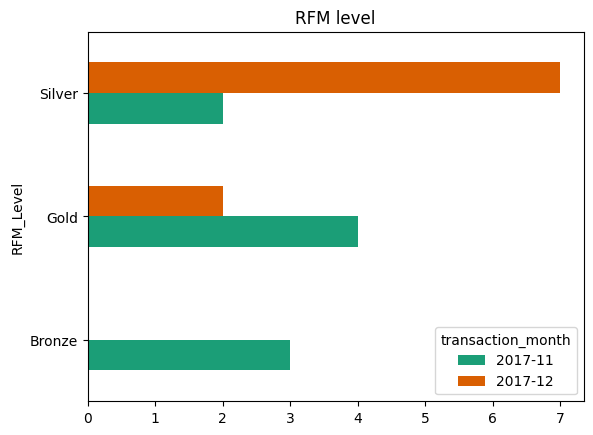

In [ ]:
dfn = df1112.groupby(['transaction_month','RFM_Level']).count().unstack('transaction_month')
dfn['transaction_id'].plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.title('RFM level')

Text(0.5, 1.0, 'Brand')

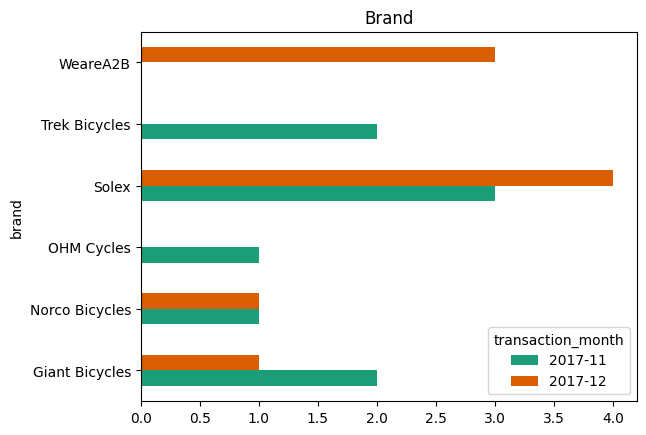

In [ ]:
dfn = df1112.groupby(['transaction_month','brand']).count().unstack('transaction_month')
dfn['transaction_id'].plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.title('Brand')

Text(0.5, 1.0, 'Wealth Segment')

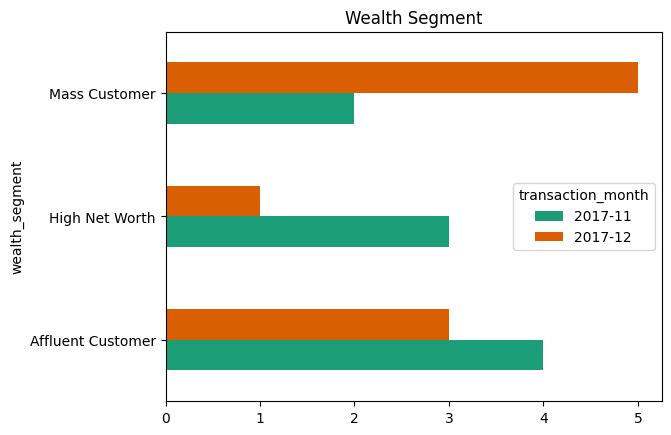

In [ ]:
dfn = df1112.groupby(['transaction_month','wealth_segment']).count().unstack('transaction_month')
dfn['transaction_id'].plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.title('Wealth Segment')